In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (9, 7)
mpl.rcParams['font.size'] = 15

In [3]:
from lookatthisgraph.utils.dataset import Dataset

In [4]:
train_set = Dataset(['../../graphnet/converted/level3/140000/'])

2020-07-02 14:40:33,009: Loading and preprocessing events, this might take a while
2020-07-02 14:40:41,344: 251256 events received
2020-07-02 14:40:51,126: Data processing complete


In [5]:
from lookatthisgraph.utils.trainer import Trainer

In [6]:
train_config = {
    'learning_rate': 7e-4,
    'scheduling_step_size': 30,
    'scheduling_gamma': .7,
    'training_target': 'energy',
    'dataset': train_set,
    'train_split': 2e3,
    'test_split': 1e5,
    'batch_size': 1024,
    'max_epochs': 100,
}

In [7]:
trainer = Trainer(train_config)

2020-07-02 14:40:56,629: 2000 training samples, 1024 validation samples, 100000 test samples received; 148232 ununsed


In [8]:
trainer.train()

2020-07-02 14:40:59,829: Learning rate changed to 0.000700 in epoch 0
2020-07-02 14:40:59,830: Training loss: 1.423e+00 | Validation loss: 2.140e+00 | Epoch 0 / 100 | Min validation loss: 2.140e+00 at epoch 0
2020-07-02 14:41:01,000: Training loss: 1.168e+00 | Validation loss: 1.711e+00 | Epoch 1 / 100 | Min validation loss: 1.711e+00 at epoch 1
2020-07-02 14:41:02,125: Training loss: 1.042e+00 | Validation loss: 8.934e-01 | Epoch 2 / 100 | Min validation loss: 8.934e-01 at epoch 2
2020-07-02 14:41:03,257: Training loss: 5.090e-01 | Validation loss: 5.922e-01 | Epoch 3 / 100 | Min validation loss: 5.922e-01 at epoch 3
2020-07-02 14:41:04,204: Training loss: 3.010e-01 | Validation loss: 9.661e-01 | Epoch 4 / 100 | Min validation loss: 5.922e-01 at epoch 3
2020-07-02 14:41:05,161: Training loss: 5.225e-01 | Validation loss: 4.234e-01 | Epoch 5 / 100 | Min validation loss: 4.234e-01 at epoch 5
2020-07-02 14:41:06,111: Training loss: 2.230e-01 | Validation loss: 5.796e-01 | Epoch 6 / 100 |

2020-07-02 14:41:58,720: Training loss: 6.115e-02 | Validation loss: 2.199e-01 | Epoch 57 / 100 | Min validation loss: 1.428e-01 at epoch 49
2020-07-02 14:41:59,666: Training loss: 9.001e-02 | Validation loss: 1.659e-01 | Epoch 58 / 100 | Min validation loss: 1.428e-01 at epoch 49
2020-07-02 14:42:00,812: Training loss: 6.028e-02 | Validation loss: 1.474e-01 | Epoch 59 / 100 | Min validation loss: 1.428e-01 at epoch 49
2020-07-02 14:42:01,756: Learning rate changed to 0.000240 in epoch 60
2020-07-02 14:42:01,757: Training loss: 6.344e-02 | Validation loss: 1.702e-01 | Epoch 60 / 100 | Min validation loss: 1.428e-01 at epoch 49
2020-07-02 14:42:02,693: Learning rate changed to 0.000343 in epoch 61
2020-07-02 14:42:02,694: Training loss: 6.294e-02 | Validation loss: 1.926e-01 | Epoch 61 / 100 | Min validation loss: 1.428e-01 at epoch 49
2020-07-02 14:42:03,643: Training loss: 8.013e-02 | Validation loss: 1.806e-01 | Epoch 62 / 100 | Min validation loss: 1.428e-01 at epoch 49
2020-07-02 1

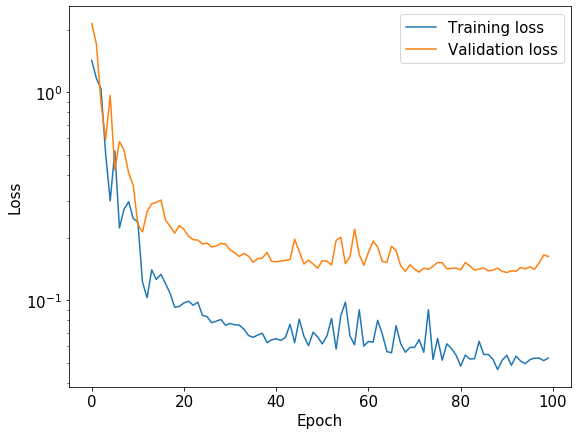

In [9]:
import numpy as np
plt.figure()
plt.plot(np.arange(len(trainer.train_losses)), trainer.train_losses, label='Training loss')
plt.plot(np.arange(len(trainer.train_losses)), trainer.validation_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

In [10]:
trainer.load_best_model()

2020-07-02 14:42:41,672: Best model loaded


In [11]:
prediction, truth = trainer.evaluate_test_samples()

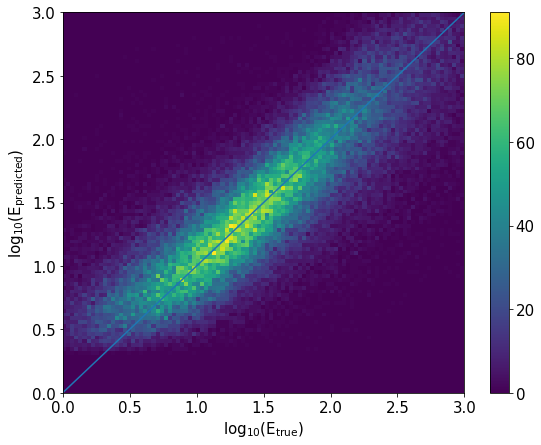

In [12]:
plt.figure()
bins = np.linspace(0,3,100)
plt.hist2d(truth, prediction, bins=[bins,bins])
plt.plot(bins, bins)
plt.colorbar()
plt.ylabel(r'$\mathregular{log_{10}(E_{predicted})}$')
plt.xlabel(r'$\mathregular{log_{10}(E_{true})}$')
plt.show()

In [13]:
trainer.save_network_info('test.p')

2020-07-02 14:43:15,527: Network dictionary saved


{'file_names': ['/home/iwsatlas1/haminh/IceCube/graphnet/converted/level3/140000'],
 'training_target': 'energy',
 'include_charge': True,
 'target_dim': 1,
 'classification': False,
 'n_total': 251256,
 'n_train': 2000,
 'n_val': 1024,
 'n_test': 100000,
 'batch_size': 1024,
 'normalization_parameters': (array([[ 3.4287449e+01,  1.0472746e+02],
         [-3.0587448e+01,  9.7032852e+01],
         [-3.3010883e+02,  1.1615600e+02],
         [ 1.0635539e+04,  1.0818705e+03],
         [-8.2687497e-02,  2.8002730e-01]], dtype=float32), 'gauss'),
 'loss_function': 'MSELoss()',
 'net': ConvNet(
   (conv1): TAGConv(5, 128, K=2)
   (conv2): TAGConv(128, 128, K=2)
   (conv3): TAGConv(128, 128, K=2)
   (batchnorm1): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (linear1): Linear(in_features=768, out_features=768, bias=True)
   (linear2): Linear(in_features=768, out_features=768, bias=True)
   (linear3): Linear(in_features=768, out_features=768, bias=True)
   

In [17]:
import pickle
info = pickle.load(open('test.p', 'rb'))

In [18]:
from lookatthisgraph.utils.model import Model

In [19]:
m = Model(info)

In [20]:
test_set = Dataset(['../../graphnet/converted/level7/1400000/'], info['normalization_parameters'][0])

2020-07-02 14:43:34,148: Loading and preprocessing events, this might take a while
2020-07-02 14:43:34,986: 25711 events received
2020-07-02 14:43:35,456: Normalization parameters received, overwriting existing parameters
2020-07-02 14:43:35,816: Data processing complete


In [21]:
m.set_device_type('cpu')

In [22]:
p, t = m.evaluate_dataset(test_set, 1024)

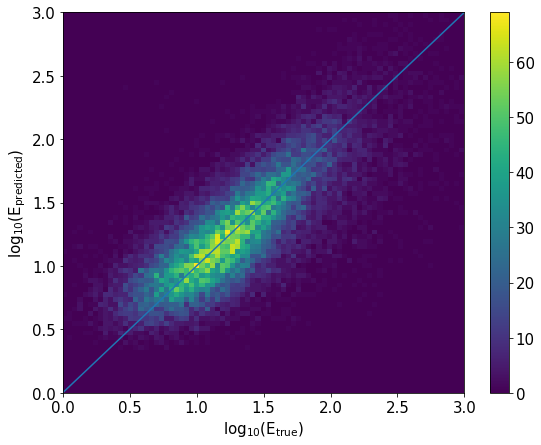

In [25]:
plt.figure()
bins = np.linspace(0,3,80)
plt.hist2d(t.flatten(), p.flatten(), bins=[bins, bins])
plt.plot(bins,bins)
plt.ylabel(r'$\mathregular{log_{10}(E_{predicted})}$')
plt.xlabel(r'$\mathregular{log_{10}(E_{true})}$')
plt.colorbar()
plt.show()